124.46147230889235
0.8739076900968993


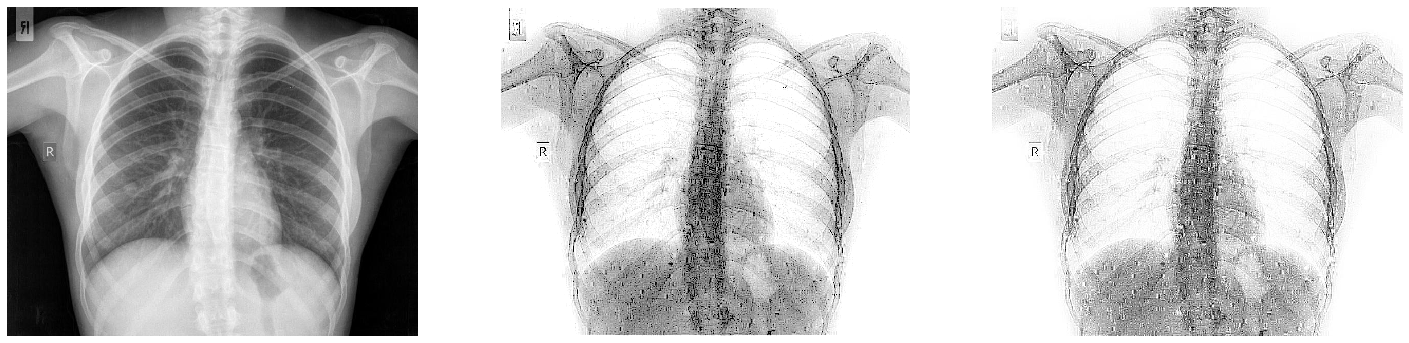

In [39]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

res = np.abs(255-img1)

kernel = -np.ones((3,3),np.float32)
kernel[1,1] = kernel[1,1]*(-9.5)
res = cv.filter2D(res, -1, kernel, borderType=cv.BORDER_CONSTANT)

res = cv.add(res,-30)
res = cv.multiply(res,0.2)

res = (np.log(res+1)/(np.log(1+np.max(res))))*255
res = np.array(res,dtype=np.uint8)


res[res < 10] = 30

# res = cv.add(res.astype('uint8'),2)

print(mse(res,img2))
print(met.structural_similarity(res.astype('float'),img2.astype('float')))


fig, axes = plt.subplots(1, 3, figsize=(25,10))


plt.subplot(131), plt.imshow(img1, cmap='gray'), plt.axis('off')
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off')
plt.subplot(133), plt.imshow(img2, cmap='gray'), plt.axis('off')
plt.show()